<h1><u><b>HEALTHCARE FRAUD DETECTION ANALYSIS<b><u></h1>

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Datasets

In [2]:
##Datasets
provider_data=pd.read_csv('/home/kinoti/Documents/Flatiron/dsc-data-science-env-config/phase5/capstone/Project/Capstone-Project/Data/provider_fraud_detection_data.csv')
Beneficiary_data=pd.read_csv('/home/kinoti/Documents/Flatiron/dsc-data-science-env-config/phase5/capstone/Project/Capstone-Project/Data/Train_Beneficiarydata-1542865627584.csv')
Inpatient_data= pd.read_csv('/home/kinoti/Documents/Flatiron/dsc-data-science-env-config/phase5/capstone/Project/Capstone-Project/Data/Train_Inpatientdata-1542865627584.csv')
Outpatient_data=pd.read_csv('/home/kinoti/Documents/Flatiron/dsc-data-science-env-config/phase5/capstone/Project/Capstone-Project/Data/Train_Outpatientdata-1542865627584.csv')

-- <b>Data Preprocessing<b>
<ol>
<li>Check missing values</li>
<li>Duplicates</li>
<li>display total number of rows</li>
<ol>

In [3]:
#data_preprocessing function 
def data_preprocessing(data):
    # Check for missing values
    missing_values = data.isnull().sum().sum()
    print("Missing Values:")
    print(missing_values)
    print()

    # Check for duplicates
    duplicates = data.duplicated().sum()
    print("Number of Duplicates:", duplicates)
    print()

    # Display total number of rows
    num_rows = data.shape[0]
    print("Total Number of Rows:", num_rows)
    print()



    # Statistical summary
    print("Statistical Summary:")
    print(data.describe(include='all'))


<h2><u><b>Provider Data</b><u></h2>

In [4]:
provider_data

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [5]:
data_preprocessing(provider_data)

Missing Values:
0

Number of Duplicates: 0

Total Number of Rows: 5410

Statistical Summary:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV51001             No
freq           1           4904


<h2><u><b>Out patient data<b></u><h2>

In [6]:
Outpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [7]:
data_preprocessing(Outpatient_data)

Missing Values:
8093719

Number of Duplicates: 0

Total Number of Rows: 517737

Statistical Summary:
           BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
count      517737     517737       517737      517737    517737   
unique     133980     517737          385         366      5012   
top     BENE42721  CLM624349   2009-03-03  2009-03-03  PRV51459   
freq           29          1         1574        1563      8240   
mean          NaN        NaN          NaN         NaN       NaN   
std           NaN        NaN          NaN         NaN       NaN   
min           NaN        NaN          NaN         NaN       NaN   
25%           NaN        NaN          NaN         NaN       NaN   
50%           NaN        NaN          NaN         NaN       NaN   
75%           NaN        NaN          NaN         NaN       NaN   
max           NaN        NaN          NaN         NaN       NaN   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
count            51773

In [8]:
Outpatient_data_info = pd.DataFrame(data=Outpatient_data.columns, columns=['Column Name'])
Outpatient_data_info['Data Type'] = Outpatient_data.dtypes.values
Outpatient_data_info['No. of Unique Values'] = Outpatient_data.nunique().values
Outpatient_data_info['Count of Missing Values'] = Outpatient_data.isna().sum().values
Outpatient_data_info['Percent of Missing Values'] = (round(Outpatient_data.isna().sum() / len(Outpatient_data) * 100)).values


In [9]:
Outpatient_data_info

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,133980,0,0.0
1,ClaimID,object,517737,0,0.0
2,ClaimStartDt,object,385,0,0.0
3,ClaimEndDt,object,366,0,0.0
4,Provider,object,5012,0,0.0
5,InscClaimAmtReimbursed,int64,342,0,0.0
6,AttendingPhysician,object,74109,1396,0.0
7,OperatingPhysician,object,28532,427120,82.0
8,OtherPhysician,object,44388,322691,62.0
9,ClmDiagnosisCode_1,object,10354,10453,2.0


''' check for relevant columns

<h2><u><b>In Patient data<b></u></h2>

In [10]:
Inpatient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_preprocessing(Inpatient_data)

Missing Values:
344003

Number of Duplicates: 0

Total Number of Rows: 40474

Statistical Summary:
            BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
count        40474     40474        40474       40474     40474   
unique       31289     40474          398         365      2092   
top     BENE134170  CLM46614   2009-02-10  2009-02-11  PRV52019   
freq             8         1          145         153       516   
mean           NaN       NaN          NaN         NaN       NaN   
std            NaN       NaN          NaN         NaN       NaN   
min            NaN       NaN          NaN         NaN       NaN   
25%            NaN       NaN          NaN         NaN       NaN   
50%            NaN       NaN          NaN         NaN       NaN   
75%            NaN       NaN          NaN         NaN       NaN   
max            NaN       NaN          NaN         NaN       NaN   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
count             40474.

In [12]:
Inpatient_data_info = pd.DataFrame(data=Inpatient_data.columns, columns=['Column Name'])
Inpatient_data_info['Data Type'] = Inpatient_data.dtypes.values
Inpatient_data_info['No. of Unique Values'] = Inpatient_data.nunique().values
Inpatient_data_info['Count of Missing Values'] = Inpatient_data.isna().sum().values
Inpatient_data_info['Percent of Missing Values'] = (round(Inpatient_data.isna().sum() / len(Inpatient_data) * 100)).values


In [13]:
Inpatient_data_info

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,31289,0,0.0
1,ClaimID,object,40474,0,0.0
2,ClaimStartDt,object,398,0,0.0
3,ClaimEndDt,object,365,0,0.0
4,Provider,object,2092,0,0.0
5,InscClaimAmtReimbursed,int64,146,0,0.0
6,AttendingPhysician,object,11604,112,0.0
7,OperatingPhysician,object,8287,16644,41.0
8,OtherPhysician,object,2877,35784,88.0
9,AdmissionDt,object,398,0,0.0


<h2><u><b>Beneficiary Data<b><u></h2>

In [14]:
Beneficiary_data

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [15]:
data_preprocessing(Beneficiary_data)

Missing Values:
137135

Number of Duplicates: 0

Total Number of Rows: 138556

Statistical Summary:
           BeneID         DOB         DOD         Gender           Race  \
count      138556      138556        1421  138556.000000  138556.000000   
unique     138556         900          11            NaN            NaN   
top     BENE11001  1939-10-01  2009-12-01            NaN            NaN   
freq            1         540         182            NaN            NaN   
mean          NaN         NaN         NaN       1.570932       1.254511   
std           NaN         NaN         NaN       0.494945       0.717007   
min           NaN         NaN         NaN       1.000000       1.000000   
25%           NaN         NaN         NaN       1.000000       1.000000   
50%           NaN         NaN         NaN       2.000000       1.000000   
75%           NaN         NaN         NaN       2.000000       1.000000   
max           NaN         NaN         NaN       2.000000       5.000000   


In [16]:
Beneficiary_data_info = pd.DataFrame(data=Beneficiary_data.columns, columns=['Column Name'])
Beneficiary_data_info['Data Type'] = Beneficiary_data.dtypes.values
Beneficiary_data_info['No. of Unique Values'] = Beneficiary_data.nunique().values
Beneficiary_data_info['Count of Missing Values'] = Beneficiary_data.isna().sum().values
Beneficiary_data_info['Percent of Missing Values'] = (round(Beneficiary_data.isna().sum() / len(Beneficiary_data) * 100)).values

In [17]:
Beneficiary_data_info

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,138556,0,0.0
1,DOB,object,900,0,0.0
2,DOD,object,11,137135,99.0
3,Gender,int64,2,0,0.0
4,Race,int64,4,0,0.0
5,RenalDiseaseIndicator,object,2,0,0.0
6,State,int64,52,0,0.0
7,County,int64,314,0,0.0
8,NoOfMonths_PartACov,int64,13,0,0.0
9,NoOfMonths_PartBCov,int64,13,0,0.0


<p>Checking for common columns in outpatients and inpatient dataset

In [18]:
col_outpatient=[]
for o in Outpatient_data.columns:
    if o in Inpatient_data.columns:
        col_outpatient.append(o)

#Checking each of the columns in the Inpatient dataset if they are present in the Outpatient dataset
col_inpatient=[]
for i in Inpatient_data.columns:
    if i in Outpatient_data.columns:
        col_inpatient.append(i)
print("Cols of Outpatient dataset also present in Inpatient dataset",len(col_outpatient))
print("Cols of Inpatient dataset also present in Outpatient dataset",len(col_inpatient))

#Checking for common column names in the outpatient and the inpatient datasets 
c_s= set(col_outpatient).intersection(set(col_inpatient))
c_s= list(c_s)
print("Common columns between the outpatient and the inpatient datasets",len(c_s))

Cols of Outpatient dataset also present in Inpatient dataset 27
Cols of Inpatient dataset also present in Outpatient dataset 27
Common columns between the outpatient and the inpatient datasets 27


In [19]:
c_s

['ClmDiagnosisCode_10',
 'ClmDiagnosisCode_8',
 'ClmProcedureCode_5',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_9',
 'ClaimID',
 'OtherPhysician',
 'BeneID',
 'ClmProcedureCode_1',
 'ClmProcedureCode_3',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'Provider',
 'ClmProcedureCode_6',
 'AttendingPhysician',
 'ClaimStartDt',
 'InscClaimAmtReimbursed',
 'ClmAdmitDiagnosisCode',
 'ClaimEndDt',
 'ClmDiagnosisCode_4',
 'OperatingPhysician',
 'ClmProcedureCode_4',
 'ClmDiagnosisCode_3',
 'DeductibleAmtPaid',
 'ClmDiagnosisCode_7',
 'ClmProcedureCode_2',
 'ClmDiagnosisCode_1']

In [20]:
patient_data = pd.merge(Outpatient_data,Inpatient_data,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [21]:
# All the patient data
patient_data

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaN,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2851,...,NaN,NaN,NaN,NaN,NaN,1068.0,2859,2009-09-28,2009-10-02,812
558207,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,42823,...,NaN,NaN,NaN,NaN,NaN,1068.0,79902,2009-11-03,2009-11-06,228
558208,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,4280,...,NaN,NaN,NaN,NaN,NaN,1068.0,78605,2009-11-18,2009-11-22,302
558209,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,7802,...,NaN,NaN,NaN,NaN,NaN,1068.0,7802,2009-12-17,2009-12-18,309


In [ ]:
(Inpatient_data['ClaimStartDt']==Inpatient_data['AdmissionDt']).sum()

In [ ]:
x=pd.DataFrame(Inpatient_data.loc[Inpatient_data['ClaimStartDt']!=Inpatient_data['AdmissionDt']]['ClaimStartDt'])
x['AdmissionDt']=Inpatient_data.loc[Inpatient_data['ClaimStartDt']!=Inpatient_data['AdmissionDt']]['AdmissionDt']
x

In [22]:
# Merge Allpatientdata with beneficiary data
all_patient = pd.merge(patient_data,Beneficiary_data,
                            left_on='BeneID',right_on='BeneID',how='outer')
print('Shape:', all_patient.shape)
all_patient.head()

Shape: (558211, 54)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760


In [23]:
# Merge the final dataset with the provider
final_df = pd.merge(all_patient,provider_data,left_on= 'Provider',right_on='Provider',how='outer')
print('Shape:', final_df.shape)
final_df.head()

Shape: (558211, 55)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [24]:
final_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [25]:
# Displaying the general information of final_df
final_df_info = pd.DataFrame(data=final_df.columns, columns=['Column Name'])
final_df_info['Data Type'] = final_df.dtypes.values
final_df_info['No. of Unique Values'] = final_df.nunique().values
final_df_info['Count of Missing Values'] = final_df.isna().sum().values
final_df_info['Percent of Missing Values'] = (round(final_df.isna().sum() / len(final_df) * 100)).values

In [26]:
final_df_info

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,138556,0,0.0
1,ClaimID,object,558211,0,0.0
2,ClaimStartDt,object,398,0,0.0
3,ClaimEndDt,object,366,0,0.0
4,Provider,object,5410,0,0.0
5,InscClaimAmtReimbursed,int64,438,0,0.0
6,AttendingPhysician,object,82063,1508,0.0
7,OperatingPhysician,object,35315,443764,79.0
8,OtherPhysician,object,46457,358475,64.0
9,ClmDiagnosisCode_1,object,10450,10453,2.0


## Handling Missing Values

In [27]:
# Select the relevant columns
columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'DOB', 'DOD', 'Gender',
       'RenalDiseaseIndicator', 'State', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud']

In [28]:
# Final df with the relevant columns
final_df = final_df[columns]

final_df.shape

(558211, 53)

In [29]:
#%pip install fancyimpute

In [30]:
# Import the library
from fancyimpute import IterativeImputer

In [31]:
from fancyimpute import KNN, IterativeImputer #algorithm importing from fancyimpute module
final_df_knn=final_df.copy()   #creating copy of train beneficiary data
final_df_mice=final_df.copy()  #creating copy of train beneficiary data

knn=KNN()


final_df_knn.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [32]:
final_df_knn.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                

In [33]:
final_df_knn.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosisCode_10                 object
ClmProcedureCode_1                 float64
ClmProcedureCode_2                 float64
ClmProcedureCode_3                 float64
ClmProcedureCode_4                 float64
ClmProcedur

In [34]:
# mice instance
mice=IterativeImputer(random_state=102)

In [36]:
#final_df_mice.loc[:,'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt']=mice.fit_transform(final_df_knn)
final_df_mice.loc[:, 'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt'] = mice.fit_transform(final_df_knn.loc[:, 'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt'])

/tmp/ipykernel_21418/1393005462.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final_df_mice.loc[:, 'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt'] = mice.fit_transform(final_df_knn.loc[:, 'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt'])


In [39]:
final_df_mice.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                

### Handling Outliers

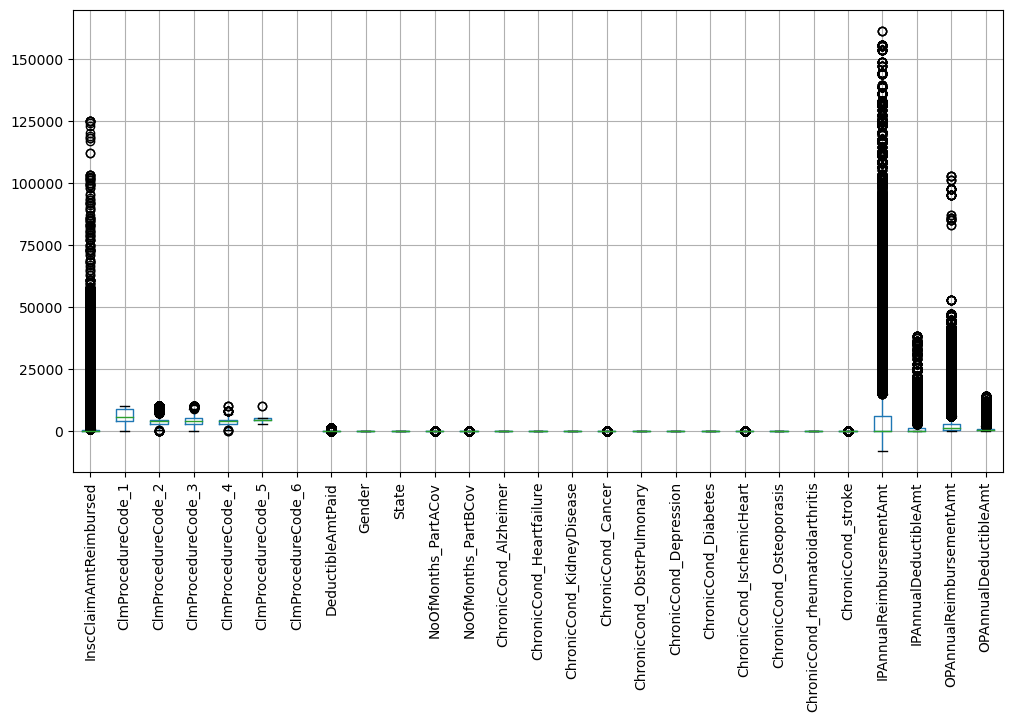

In [44]:
# Box plot to check for the outliers
plt.figure(figsize=(12,6))
final_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [50]:
from scipy.stats.mstats import winsorize

# Specify the percentile limits for Winsorization
lower_limit = 0.05  # Lower percentile limit
upper_limit = 0.95  # Upper percentile limit

# Apply Winsorization to specific columns
column_to_winsorize = ['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4']
for column in column_to_winsorize:
    final_df[column] = winsorize(final_df[column], limits=(lower_limit, upper_limit))


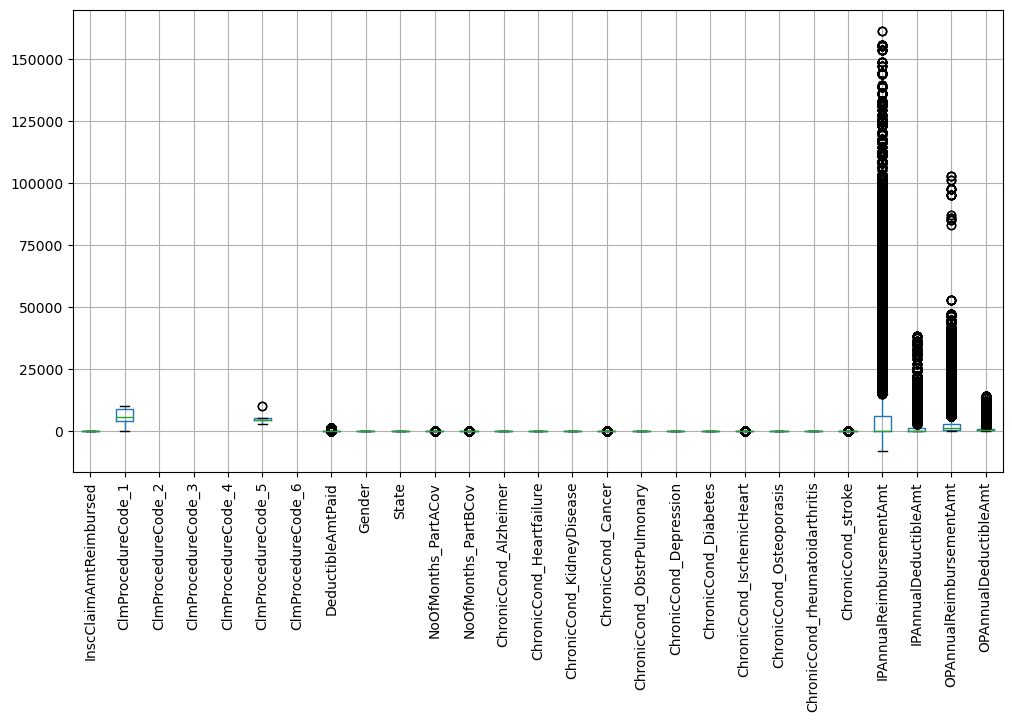

In [51]:
# Check on the outliers
plt.figure(figsize=(12,6))
final_df.boxplot()
plt.xticks(rotation=90)
plt.show()

Winsorizarization technique

## Exploratory Data Analysis(EDA)